<a href="https://colab.research.google.com/github/ademaratioluwatoyin/Hamoye-Stage-E/blob/main/Hamoye_Stage_E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip', sep=';', header=0, low_memory=False,infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])

In [58]:
df.replace('?', np.nan, inplace = True)

In [59]:
df = df.astype('float32')

In [60]:
df.fillna(df.mean(), inplace = True)

In [61]:
df_daily = df.resample('D').sum()

In [62]:
df.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.247017,-0.398231,0.998889,0.484401,0.434569,0.638555
Global_reactive_power,0.247017,1.000000,-0.111817,0.266120,0.123111,0.139231,0.089617
Voltage,-0.398231,-0.111817,1.000000,-0.409785,-0.195225,-0.166764,-0.267145
Global_intensity,0.998889,0.266120,-0.409785,1.000000,0.489298,0.440347,0.626543
Sub_metering_1,0.484401,0.123111,-0.195225,0.489298,1.000000,0.054721,0.102571
Sub_metering_2,0.434569,0.139231,-0.166764,0.440347,0.054721,1.000000,0.080872
Sub_metering_3,0.638555,0.089617,-0.267145,0.626543,0.102571,0.080872,1.000000


In [63]:
df_daily.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.041098,0.062393,0.999182,0.545338,0.481370,0.732613
Global_reactive_power,0.041098,1.000000,0.050946,0.062937,0.319394,0.182199,0.035568
Voltage,0.062393,0.050946,1.000000,0.052214,-0.003525,-0.013305,0.095189
Global_intensity,0.999182,0.062937,0.052214,1.000000,0.557975,0.490773,0.724145
Sub_metering_1,0.545338,0.319394,-0.003525,0.557975,1.000000,0.251585,0.308917
Sub_metering_2,0.481370,0.182199,-0.013305,0.490773,0.251585,1.000000,0.198360
Sub_metering_3,0.732613,0.035568,0.095189,0.724145,0.308917,0.198360,1.000000


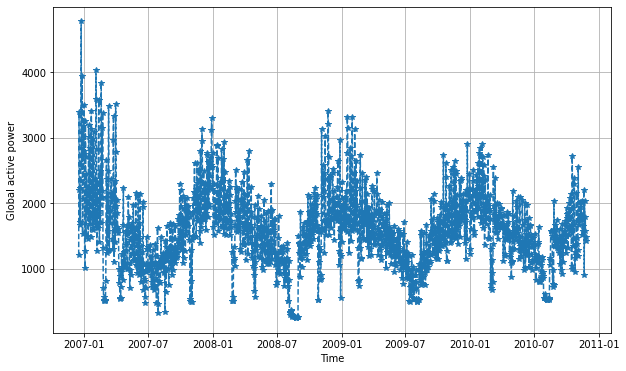

In [64]:
import matplotlib
from matplotlib import pyplot as plt
plt.figure(figsize = (10, 6))
plt.plot(df_daily.index, df_daily.Global_active_power, '--', marker = '*')
plt.grid()
plt.xlabel('Time')
plt.ylabel('Global active power')
plt.show()

In [65]:
import scipy
import scipy.stats
from scipy.stats import pearsonr

x = df['Global_active_power']
y = df['Global_reactive_power']
print(pearsonr(x, y))

(0.24701705251195766, 0.0)


In [66]:
corr2,_ = pearsonr(df_daily.Voltage,df_daily.Global_intensity)
corr2

0.05221350712869457

In [67]:
from fbprophet import Prophet

In [68]:
df_daily1 = df_daily.reset_index()
df_daily1 = df_daily1[['datetime', 'Global_active_power']]
df_daily1.rename(columns = {'datetime':'ds', 'Global_active_power':'y'}, inplace = True)

In [79]:
train_data = df_daily1.head(1077)
test_data = df_daily1.tail(365)

In [80]:
print(train_data.shape)
print(test_data.shape)

(1077, 2)
(365, 2)


In [81]:
model = Prophet()
model.fit(train_data)
prediction = model.predict(test_data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [82]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2009-11-27,1580.084009,1559.194338,2648.537732,1580.084009,1580.084009,519.056899,519.056899,519.056899,-64.127019,-64.127019,-64.127019,583.183918,583.183918,583.183918,0.0,0.0,0.0,2099.140908
1,2009-11-28,1580.207768,1863.260425,2976.725239,1580.207768,1580.207768,822.213567,822.213567,822.213567,245.813256,245.813256,245.813256,576.400311,576.400311,576.400311,0.0,0.0,0.0,2402.421335
2,2009-11-29,1580.331526,1881.122848,2946.225809,1580.331526,1580.331526,796.157722,796.157722,796.157722,228.519177,228.519177,228.519177,567.638545,567.638545,567.638545,0.0,0.0,0.0,2376.489248
3,2009-11-30,1580.455285,1422.019518,2545.024416,1580.455285,1580.455285,396.118617,396.118617,396.118617,-161.286790,-161.286790,-161.286790,557.405408,557.405408,557.405408,0.0,0.0,0.0,1976.573902
4,2009-12-01,1580.579043,1585.387400,2659.569402,1580.579043,1580.579043,516.895388,516.895388,516.895388,-29.332428,-29.332428,-29.332428,546.227816,546.227816,546.227816,0.0,0.0,0.0,2097.474431


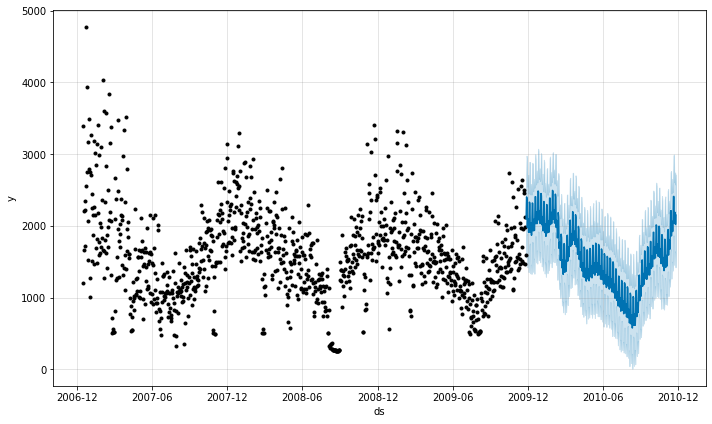

In [83]:
model.plot(prediction)
plt.show()

In [74]:
def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [84]:
print(mape(test_data['y'], prediction['yhat']))

20.815831963532684


In [85]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(test_data['y'], prediction['yhat'])))

374.604233946713


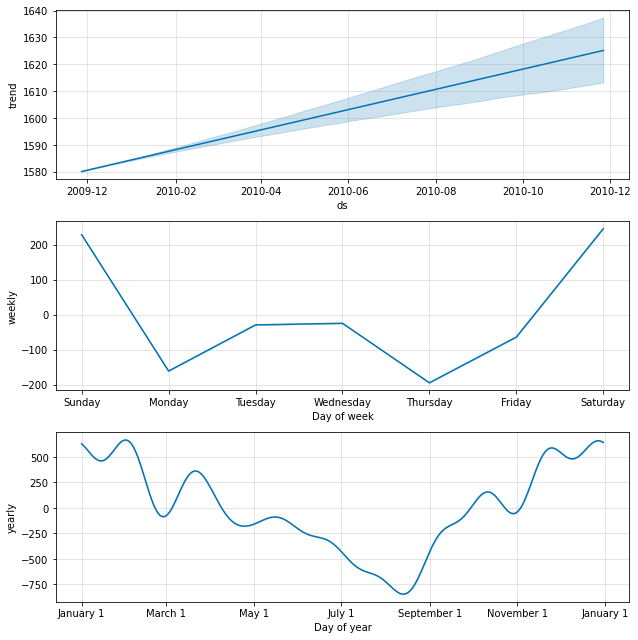

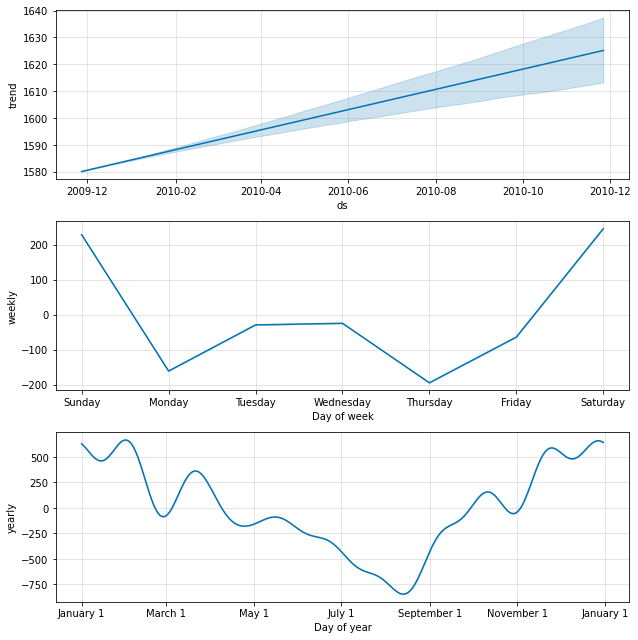

In [86]:
model.plot_components(prediction)

In [87]:
df_daily2 = df_daily.reset_index()
df_daily2.rename(columns = {'datetime':'ds','Global_active_power':'y',
                                           'Global_reactive_power':'add1','Voltage':'add2',
                                           'Global_intensity':'add3','Sub_metering_1':'add4',
                                          'Sub_metering_2':'add5','Sub_metering_3':'add6'}, inplace = True)

In [88]:
train_data = df_daily2.head(1077)
test_data = df_daily2.tail(365)
model2 = Prophet()
model2.add_regressor('add1')
model2.add_regressor('add2')
model2.add_regressor('add3')
model2.add_regressor('add4')
model2.add_regressor('add5')
model2.add_regressor('add6')
model2.fit(train_data)
forecast = model2.predict(test_data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [90]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,add2_lower,add2_upper,add3,add3_lower,add3_upper,add4,add4_lower,add4_upper,add5,add5_lower,add5_upper,add6,add6_lower,add6_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2009-11-27,1597.207251,1365.437713,1397.637499,1597.207251,1597.207251,7.516635,7.516635,7.516635,0.616011,0.616011,0.616011,-232.333805,-232.333805,-232.333805,2.202791,2.202791,2.202791,0.825649,0.825649,0.825649,3.864961,3.864961,3.864961,-216.018146,-216.018146,-216.018146,-217.307759,-217.307759,-217.307759,-0.101979,-0.101979,-0.101979,1.391591,1.391591,1.391591,0.0,0.0,0.0,1381.189105
1,2009-11-28,1597.347956,1846.048883,1880.021353,1597.347956,1597.347956,-8.857395,-8.857395,-8.857395,0.505812,0.505812,0.505812,263.405656,263.405656,263.405656,-2.028400,-2.028400,-2.028400,0.830930,0.830930,0.830930,7.751815,7.751815,7.751815,264.708105,264.708105,264.708105,261.608418,261.608418,261.608418,1.386425,1.386425,1.386425,1.713262,1.713262,1.713262,0.0,0.0,0.0,1862.056061
2,2009-11-29,1597.488661,1628.654944,1660.405013,1597.488661,1597.488661,-2.788241,-2.788241,-2.788241,1.224994,1.224994,1.224994,47.460713,47.460713,47.460713,0.783576,0.783576,0.783576,-0.581772,-0.581772,-0.581772,-1.463038,-1.463038,-1.463038,46.847909,46.847909,46.847909,44.636232,44.636232,44.636232,0.141167,0.141167,0.141167,2.070510,2.070510,2.070510,0.0,0.0,0.0,1644.336570
3,2009-11-30,1597.629366,1726.273023,1757.738947,1597.629366,1597.629366,3.904847,3.904847,3.904847,1.416343,1.416343,1.416343,131.751742,131.751742,131.751742,0.774317,0.774317,0.774317,0.844133,0.844133,0.844133,4.486631,4.486631,4.486631,145.311316,145.311316,145.311316,143.178013,143.178013,143.178013,-0.334593,-0.334593,-0.334593,2.467896,2.467896,2.467896,0.0,0.0,0.0,1742.940683
4,2009-12-01,1597.770071,1747.673733,1778.605535,1597.770071,1597.770071,5.949337,5.949337,5.949337,0.941248,0.941248,0.941248,150.954176,150.954176,150.954176,2.202791,2.202791,2.202791,0.847829,0.847829,0.847829,2.765734,2.765734,2.765734,164.911595,164.911595,164.911595,163.661116,163.661116,163.661116,-1.658690,-1.658690,-1.658690,2.909169,2.909169,2.909169,0.0,0.0,0.0,1762.681666


In [91]:
print(mape(test_data['y'], forecast['yhat']))

3.0445761457342444


In [93]:
rmse = np.sqrt(mean_squared_error(test_data['y'], forecast['yhat']))
print(rmse)

44.87909204303396


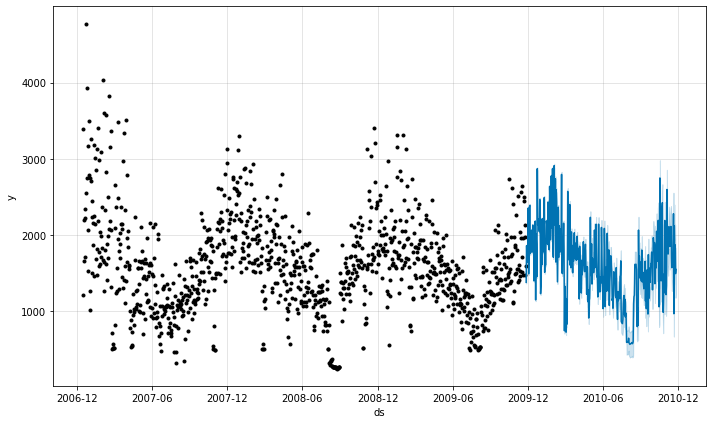

In [95]:
model2.plot(forecast)
plt.show()

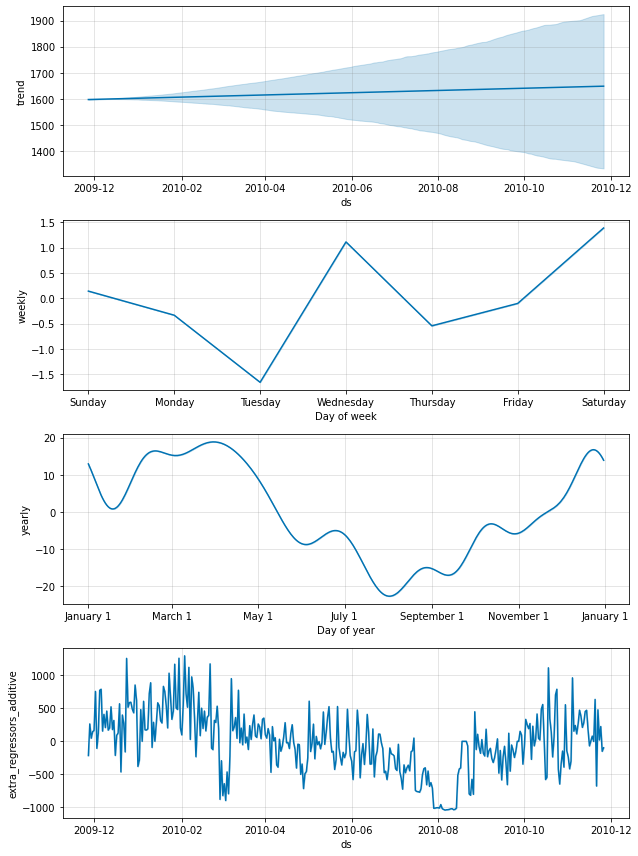

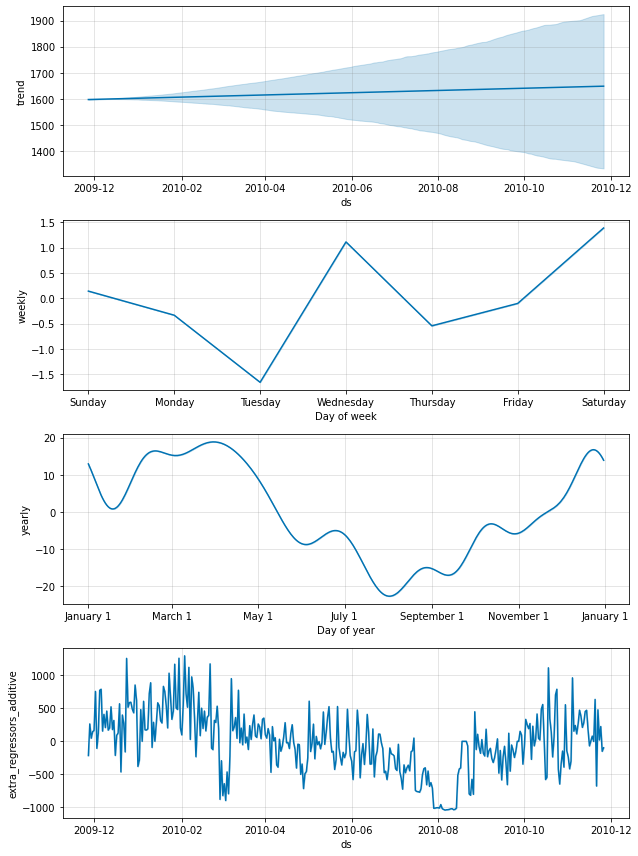

In [96]:
model2.plot_components(forecast)